<a href="https://colab.research.google.com/github/Aryanchib/DataScience_Assignment/blob/main/A6MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1.**
* Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/sample_data/ToyotaCorolla - MLR.csv')
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
data.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


* Since we have here one categorical variable,so we will create dummy table

In [ ]:
data=pd.get_dummies(data,dtype=int)
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


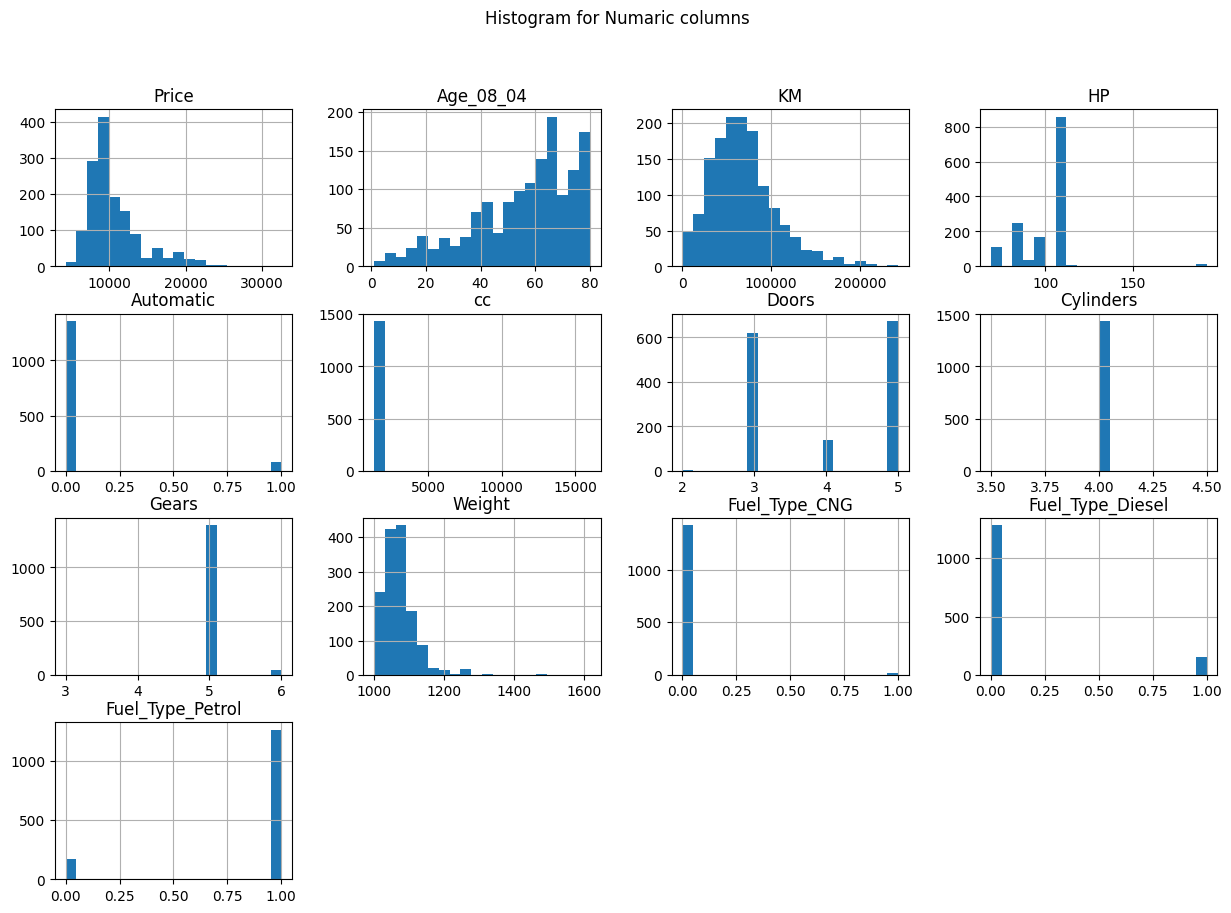

In [ ]:
data.hist(bins=20,figsize=(15,10))
plt.suptitle('Histogram for Numaric columns')
plt.show()


In [ ]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961,0.011838,0.107939,0.880223
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112,0.108196,0.310411,0.324814
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000,0.000000,0.000000,1.000000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000,0.000000,0.000000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000,1.000000,1.000000,1.000000


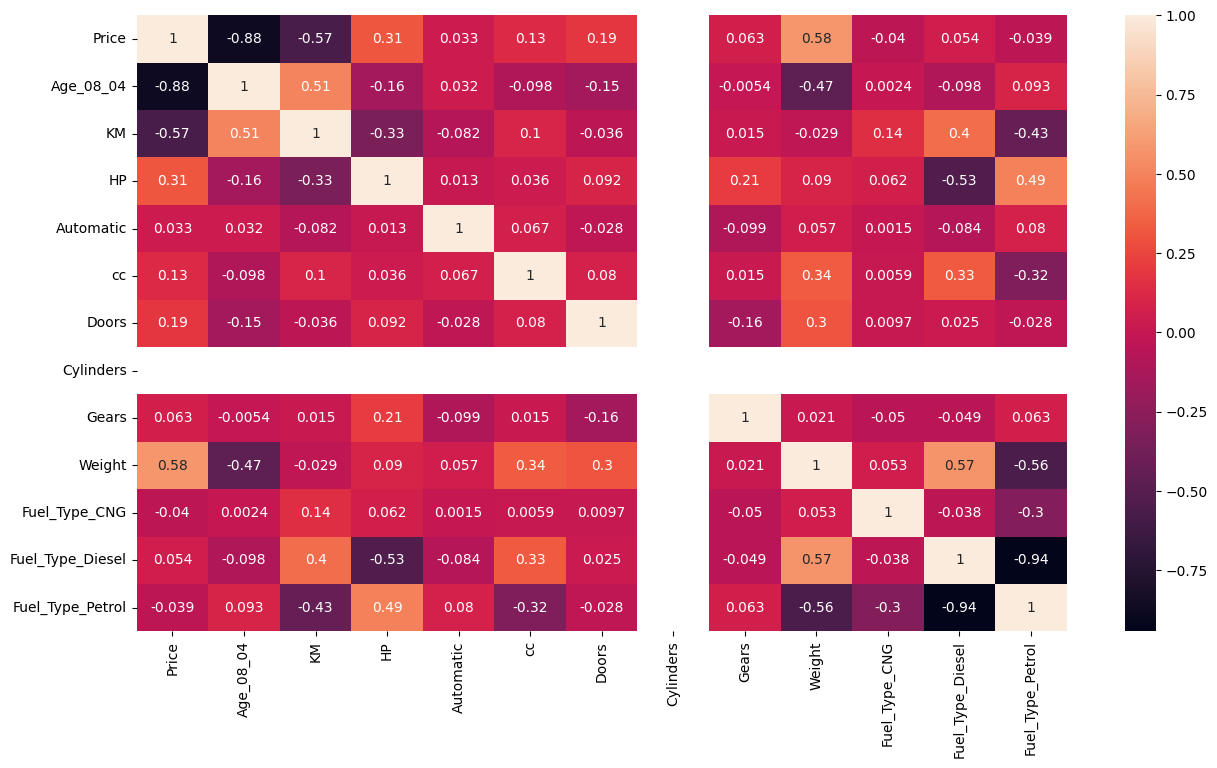

In [ ]:
plt.figure(figsize=(15,8))
correlation=data.corr()
sns.heatmap(correlation,annot=True)
plt.show()

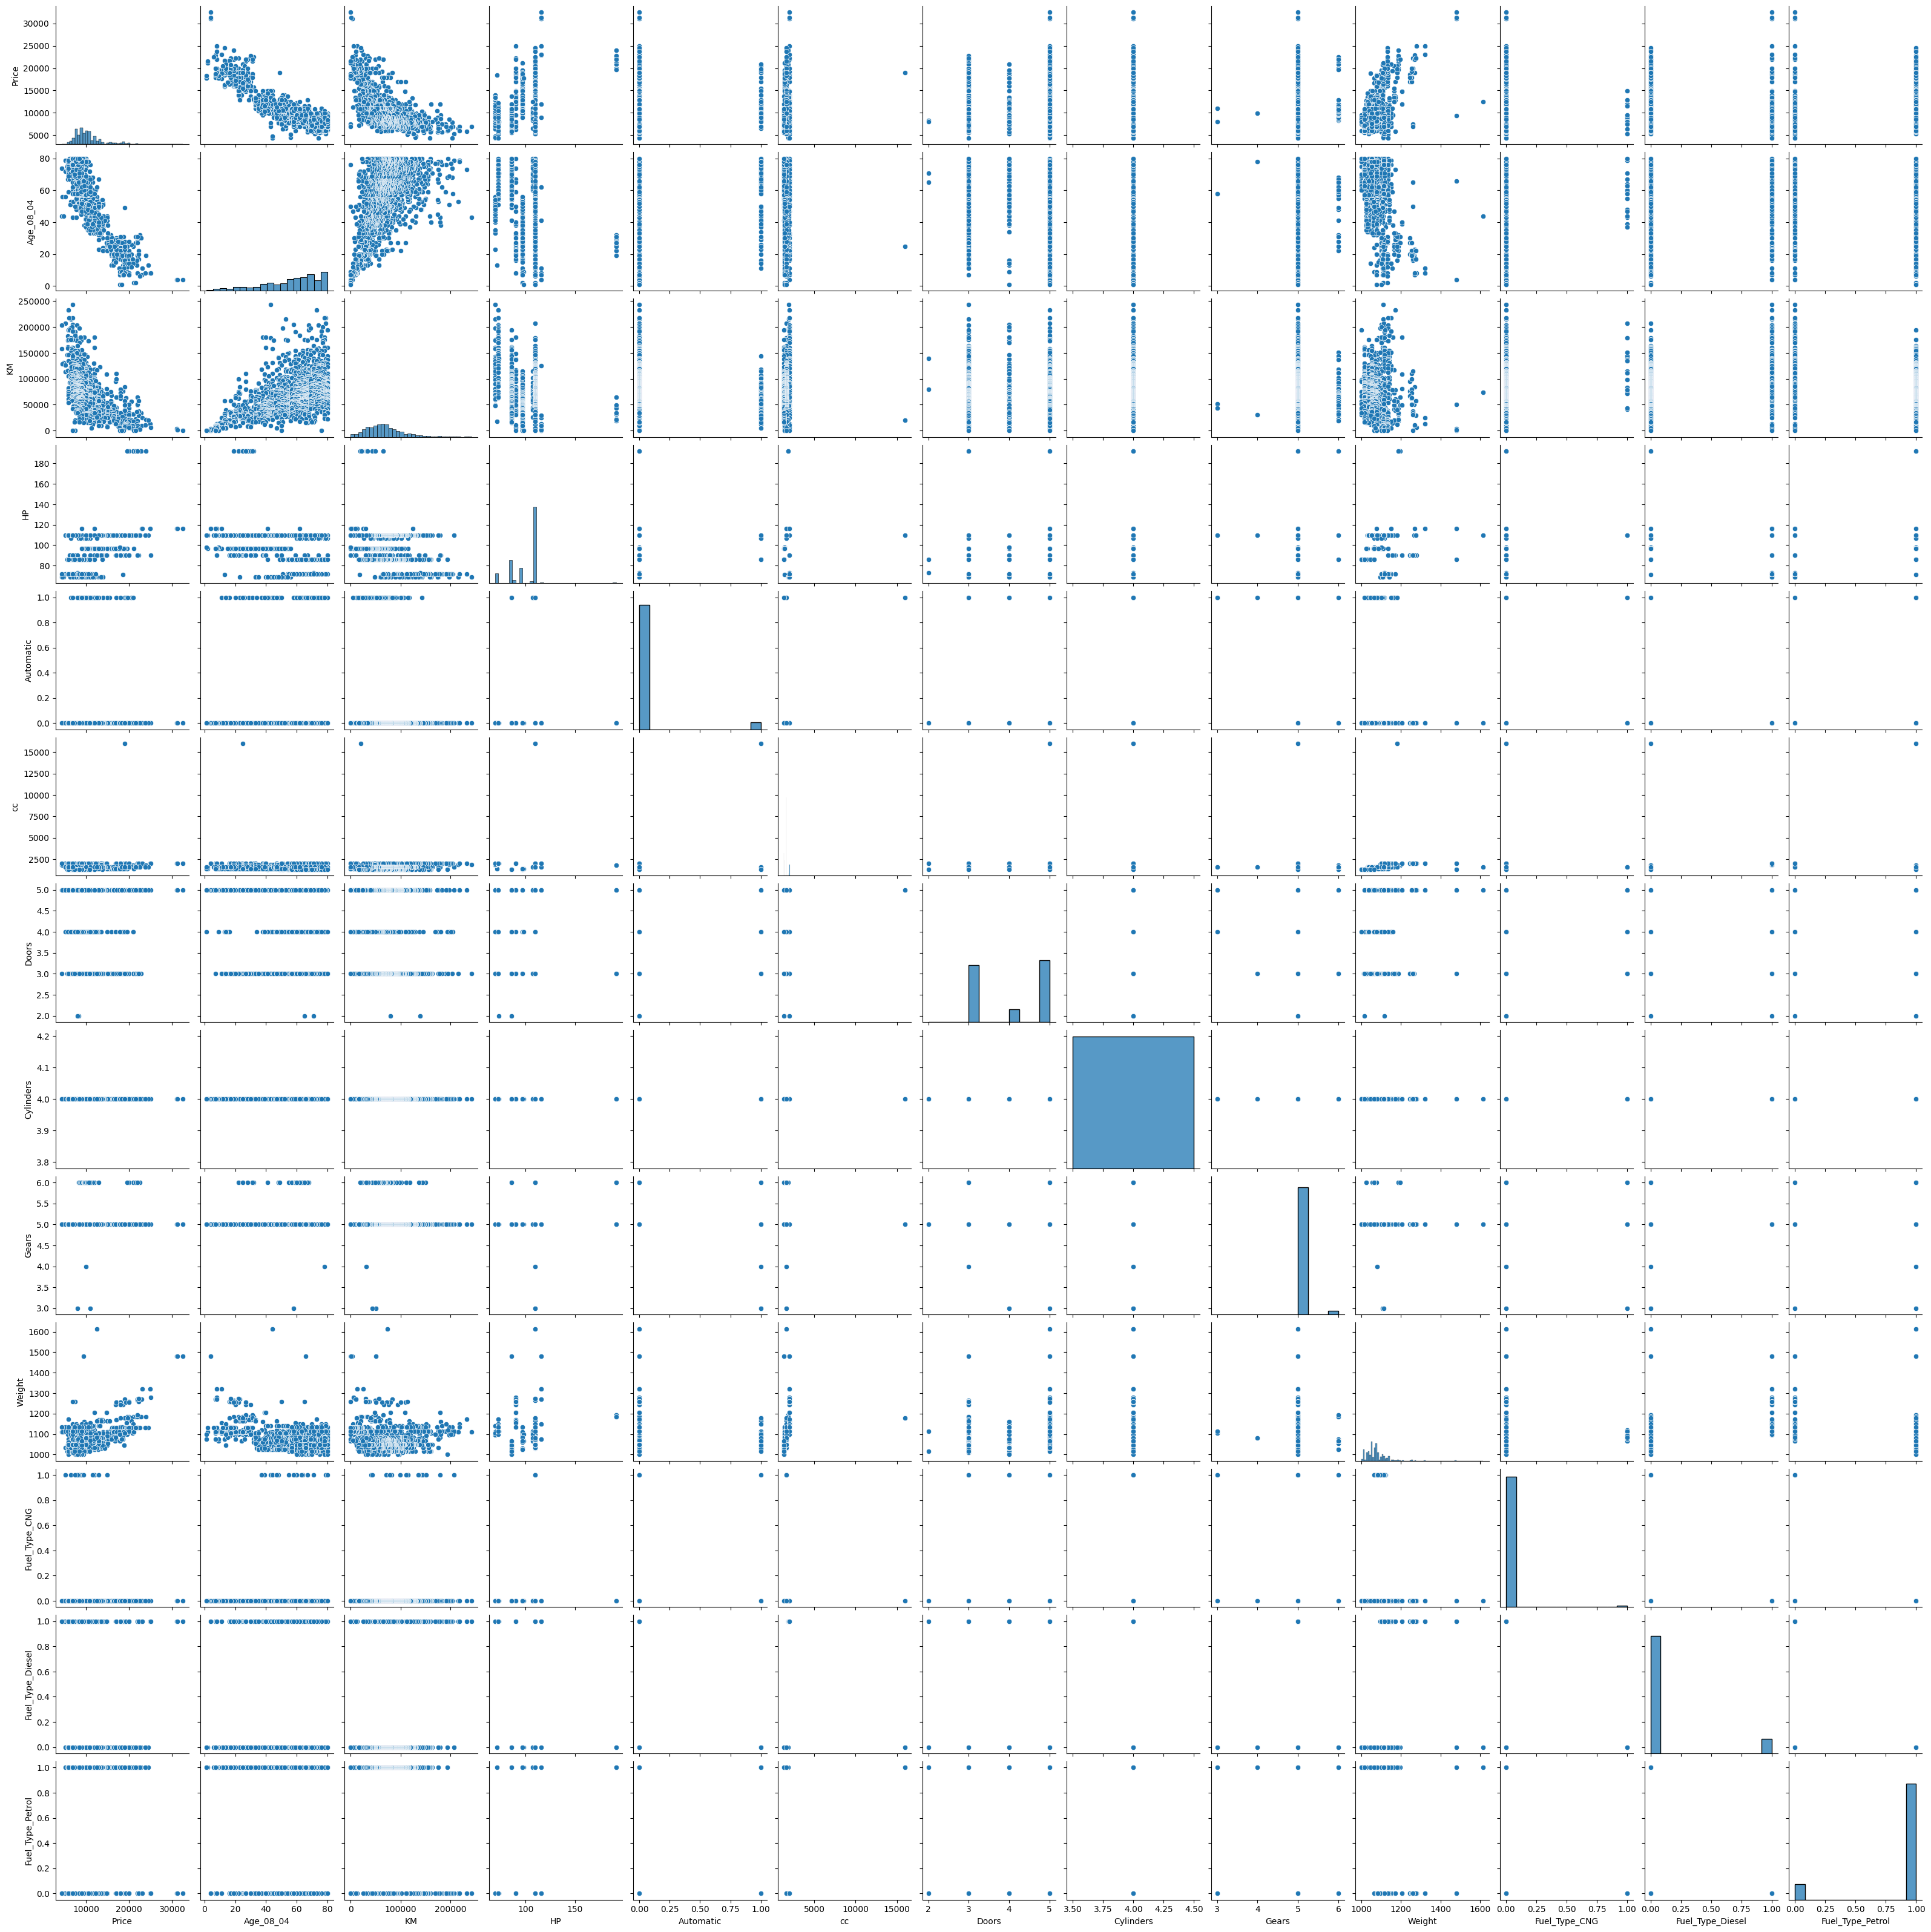

In [ ]:
sns.pairplot(data)

# **TASK:2**
* Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
features=data.drop("Price",axis=1)
target=data[["Price"]]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=100)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1148, 12)
(288, 12)
(1148, 1)
(288, 1)


#  TASK:3
* **Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models. **

In [ ]:
from sklearn.linear_model import LinearRegression

**Mehtod 1 or Model 1**

In [ ]:
model_1=LinearRegression()


In [ ]:
model_1.fit(x_train,y_train)

LinearRegression()

In [ ]:
print('Intercept',model_1.intercept_)
print('Slope',model_1.coef_)

Intercept [-11684.45272958]
Slope [[-1.21202374e+02 -1.79798518e-02  2.32883578e+01  2.97300679e+02
  -5.46848558e-02 -3.24405760e+01 -2.27373675e-13  6.27705393e+02
   2.27745531e+01 -8.46354108e+02  1.20010203e+01  8.34353088e+02]]


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
y_pred=model_1.predict(x_test)
model_1_mse=mean_squared_error(y_test,y_pred)
model_1_r2=r2_score(y_test,y_pred)

In [ ]:
print("mse:",model_1_mse)
print("r2:",model_1_r2)

mse: 1847365.5835186422
r2: 0.8447999826360241


#  Method 2 or Model 2

In [ ]:
x=data.drop(['Price','HP','Doors','Gears','Cylinders','Fuel_Type_CNG','Automatic'],axis=1)
y=data[['Price']]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [ ]:
model_2=LinearRegression()
model_2.fit(x_train,y_train)

LinearRegression()

In [ ]:
model_2.fit(x_train,y_train)

LinearRegression()

In [ ]:
print('Intercept',model_2.intercept_)
print('Slope',model_2.coef_)

Intercept [-8062.311392]
Slope [[-1.24268092e+02 -1.78638797e-02  9.62858127e-01  2.24973460e+01
  -4.58168923e+02  1.54557220e+03]]


In [ ]:
y_pred1=model_2.predict(x_test)
model_2_mse=mean_squared_error(y_test,y_pred1)
model_2_r2=r2_score(y_test,y_pred1)

In [ ]:
print("mse:",model_2_mse)
print("r2:",model_2_r2)

mse: 2219907.859296834
r2: 0.8424109307311043


# Method 3 or Model 3

In [ ]:
features1=data.drop("Price",axis=1)
target1=data[["Price"]]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features1,target1,test_size=0.2,random_state=100)


In [ ]:
from sklearn.linear_model import Lasso,Ridge



In [ ]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [ ]:
print('Intercept',lasso.intercept_)
print('Slope',lasso.coef_)

Intercept [-11523.69767516]
Slope [-1.21100338e+02 -1.80621981e-02  2.33312809e+01  2.73268189e+02
 -5.33451738e-02 -3.23794796e+01  0.00000000e+00  5.99249034e+02
  2.27669899e+01 -7.64232075e+02 -0.00000000e+00  8.17614206e+02]


In [ ]:
y_pred2=lasso.predict(x_test)
lasso_mse=mean_squared_error(y_test,y_pred2)
lasso_r2=r2_score(y_test,y_pred2)


In [ ]:
print("mse:",lasso_mse)
print("r2:",lasso_r2)


mse: 1841545.5595637753
r2: 0.845288931779016


# TASK 4:
Evaluate the performance of the models using appropriate evaluation metrics on the testing dataset

In [ ]:
model_metrics=pd.DataFrame({
    'MEAN SQUARED ERROR':[model_1_mse,model_2_mse,lasso_mse],
    'R2 VALUE':[model_1_r2,model_2_r2,lasso_r2]
},index=['Model 1','Model 2','Model 3'])


In [ ]:
model_metrics

,MEAN SQUARED ERROR,R2 VALUE
Model 1,1.847366e+06,0.844800
Model 2,2.219908e+06,0.842411
Model 3,1.841546e+06,0.845289


# TASK 5:
Apply Lasso and Ridge methods on the models.
# LASSO Method

In [ ]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [ ]:
print('Intercept',lasso.intercept_)
print('Slope',lasso.coef_)

Intercept [-11523.69767516]
Slope [-1.21100338e+02 -1.80621981e-02  2.33312809e+01  2.73268189e+02
 -5.33451738e-02 -3.23794796e+01  0.00000000e+00  5.99249034e+02
  2.27669899e+01 -7.64232075e+02 -0.00000000e+00  8.17614206e+02]


In [ ]:
y_pred2=lasso.predict(x_test)
lasso_mse=mean_squared_error(y_test,y_pred2)
lasso_r2=r2_score(y_test,y_pred2)

In [ ]:
print("mse:",lasso_mse)
print("r2:",lasso_r2)

mse: 1841545.5595637753
r2: 0.845288931779016


# RIDGE METHOD

In [ ]:
ridge = Ridge(alpha=1)


In [ ]:
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [ ]:
y_pred3=ridge.predict(x_test)
ridge_mse=mean_squared_error(y_test,y_pred3)
ridge_r2=r2_score(y_test,y_pred3)


In [ ]:
print('Intercept',ridge.intercept_)
print('Slope',ridge.coef_)

Intercept [-11573.28585862]
Slope [-1.21153381e+02 -1.80345339e-02  2.33380442e+01  2.90507388e+02
 -5.43065369e-02 -3.27906655e+01  0.00000000e+00  6.13601473e+02
  2.27565384e+01 -8.01766229e+02 -7.36087226e+00  8.09127101e+02]


In [ ]:
print("mse:",ridge_mse)
print("r2:",ridge_r2)

mse: 1843213.5032636859
r2: 0.845148805269408


# Interview Questions

# Interview Questions
# 1. Normalization & Standardization
# Normalization scales the features to a range between 0 and 1, whereas standardization scales the features so that they have mean 0 and standard deviation 1.
# Both techniques help in improving the performance and convergence of machine learning algorithms, especially those based on gradient descent.

# 2. Techniques to address multicollinearity
# - Remove one of the correlated variables.
# - Combine the correlated variables into a single feature.
# - Use dimensionality reduction techniques like Principal Component Analysis (PCA).
# - Regularization techniques like Lasso and Ridge regression.

# Assumptions made during the analysis:
# - The dataset is assumed to be representative of the population.
# - There are no significant outliers in the dataset.
# - The relationship between the independent variables and the dependent variable is linear.

# Implications of assumptions:
# Violation of these assumptions may lead to biased estimates and incorrect inferences. It's important to validate these assumptions before interpreting the results.